<a href="https://colab.research.google.com/github/ananyapoonsawat/Python_dataviz2023/blob/main/Project2_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

**Due Date: Sunday, October 11**

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [1]:
from IPython.lib.display import YouTubeVideo

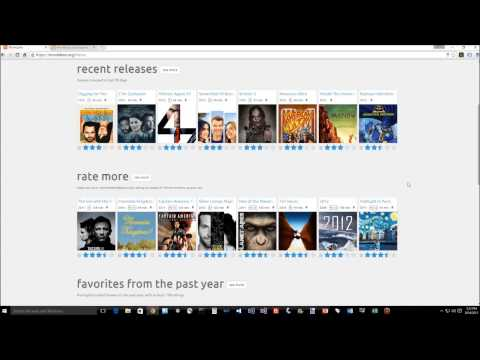

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

นางสาวเพ็ญพิชชา วรรณ์ชูมาตร์ 643020063-4 penpitcha.wa@kkumail.com

นางสาวสุชาดา อุปพงษ์ 643020524-4 suchada.u@kkumail.com

นางสาวอนัญญา พูลสวัสดิ์ 643020526-0 ananya.po@kkumail.com

นางสาววิลันดา ทาระมาตย์ 643021271-2 wilanda.t@kkumail.com

นางสาวสุชานาถ พิลาภ 643021276-2 suchanat.p@kkumail.com

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:**
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

วัตถุประสงค์

ในกรณีศึกษานี้ เราจะดูชุดข้อมูล MovieLens 1M
ประกอบด้วยข้อมูลเกี่ยวกับผู้ใช้และวิธีการให้คะแนนภาพยนตร์
http://grouplens.org/datasets/movielens/
แนวคิดคือการวิเคราะห์ชุดข้อมูล คาดเดา สนับสนุนหรือหักล้างการคาดเดาเหล่านั้นด้วยข้อมูล และบอกเล่าเรื่องราวเกี่ยวกับข้อมูล!
การอ่านที่เป็นประโยชน์:

บทที่ 14.2 (เฉพาะส่วนของชุดข้อมูล MovieLens 1M), บทที่ 5, 6.2, 7.2, 8 และ 9 ของหนังสือ Python สำหรับการวิเคราะห์ข้อมูล (ดูแบบส่วนตัวใน Google Classroom)
หากคุณต้องการให้โค้ดของคุณมีขนาดกะทัดรัดจริงๆ คุณอาจต้องการดูวิธี pivot_table ของ DataFrame ของ Panda ด้วย แม้ว่าจะมีวิธีอื่นอีกมากมายในการทำกรณีศึกษาให้สมบูรณ์!
ไลบรารี Python ที่จำเป็น:

นุ่น (pandas.pydata.org)
Matplotlib (matplotlib.org)
หมายเหตุ: โปรดอย่าลืมบันทึกสมุดบันทึกบ่อยๆ เมื่อทำงานใน IPython Notebook ไม่เช่นนั้นการเปลี่ยนแปลงที่คุณทำอาจสูญหายได้

In [3]:
from google.colab import drive
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

In [4]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Problem 1:

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

In [5]:
#ออม
ratingsdat = pd.read_table("/content/drive/MyDrive/DataWarehouse/p2/ratings (1).dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'])
moviesdat = pd.read_table("/content/drive/MyDrive/DataWarehouse/p2/movies (1).dat", sep="::", header=None, names=['MovieID','Title','Genres'],encoding = "ISO-8859-1")
usersdat = pd.read_table("/content/drive/MyDrive/DataWarehouse/p2/users (1).dat", sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'])

<ipython-input-5-fd063348c648>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratingsdat = pd.read_table("/content/drive/MyDrive/DataWarehouse/p2/ratings (1).dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'])
<ipython-input-5-fd063348c648>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  moviesdat = pd.read_table("/content/drive/MyDrive/DataWarehouse/p2/movies (1).dat", sep="::", header=None, names=['MovieID','Title','Genres'],encoding = "ISO-8859-1")
<ipython-input-5-fd063348c648>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support 

In [6]:
#แอน
#ratingsdat = pd.read_table("/content/drive/MyDrive/อญา/ratings.dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'])
#moviesdat = pd.read_table("/content/drive/MyDrive/อญา/movies.dat", sep="::", header=None, names=['MovieID','Title','Genres'],encoding = "ISO-8859-1")
#usersdat = pd.read_table("/content/drive/MyDrive/อญา/users.dat", sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'])

In [7]:
ratingsdat

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [8]:
usersdat

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [9]:
moviesdat

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [10]:
df = ratingsdat.merge ( moviesdat , how="left" , on='MovieID' )
df1 = df.merge ( usersdat , how="left" , on='UserID' )
ratingsdat.to_hdf('data.h5', key='rating')
moviesdat.to_hdf('data.h5', key='movie')
usersdat.to_hdf('data.h5', key='user')
df1.to_hdf('data.h5', key='data_use')

## Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

    รายงานรายละเอียดพื้นฐานของข้อมูลที่คุณรวบรวม ตัวอย่างเช่น:
มีภาพยนตร์กี่เรื่องที่มีเรตติ้งเฉลี่ยมากกว่า 4.5 โดยรวม?

มีภาพยนตร์กี่เรื่องที่มีเรตติ้งเฉลี่ยมากกว่า 4.5 ในหมู่ผู้ชาย? แล้วผู้หญิงล่ะ?

มีภาพยนตร์กี่เรื่องที่มีคะแนนเฉลี่ยมากกว่า 4.5 ในกลุ่มผู้ชายอายุเกิน 30 ปี แล้วผู้หญิงอายุเกิน 30 ล่ะ?

ภาพยนตร์ยอดนิยมสิบเรื่องคืออะไร?

เลือกสิ่งที่คุณพิจารณาว่าเป็นคำจำกัดความที่สมเหตุสมผลของ "ยอดนิยม"

พร้อมที่จะปกป้องทางเลือกนี้

ลองคาดเดาดูว่าการเอาใจกลุ่มต่างๆ เป็นเรื่องง่ายแค่ไหน? สนับสนุนคำตอบของคุณด้วยข้อมูล!

ตัวอย่างเช่น บางคนอาจคาดเดาว่าผู้ที่มีอายุระหว่าง 1 ถึง 10 ปีเป็นกลุ่มที่เอาใจง่ายที่สุดเนื่องจากพวกเขาล้วนแต่เป็นเด็กเล็ก การคาดเดานี้อาจจะจริงหรือไม่ก็ได้ แต่คุณจะสนับสนุนหรือหักล้างข้อสรุปด้วยข้อมูลอย่างไร

อย่าลืมคิดสมมติฐานของคุณเองและสนับสนุนข้อมูลเหล่านั้น!

###1.1
How many movies have an average rating over 4.5 overall? มีภาพยนตร์กี่เรื่องที่มีเรตติ้งเฉลี่ยมากกว่า 4.5 โดยรวม?
- ได้ว่า มี 21 เรื่อง

In [11]:
average_rating = df1[['Title','Rating']].groupby('Title').mean('Rating')
average_rating[average_rating['Rating'] > 4.5].count()

Rating    21
dtype: int64

###1.2
How many movies have an average rating over 4.5 among men?  How about women? มีภาพยนตร์กี่เรื่องที่มีเรตติ้งเฉลี่ยมากกว่า 4.5 ในหมู่ผู้ชาย? ในหมู่ผู้หญิง?
- ได้ว่า ผู้ชาย 23 เรื่อง ผู้หญิง 51 เรื่อง

In [12]:
rating_gender = df1[['Title','Gender','Rating']]

Male_rating = rating_gender[rating_gender['Gender']== 'M']
Female_rating = rating_gender[rating_gender['Gender']=='F']

Male_AverageRating = Male_rating.groupby('Title').mean()
Female_AverageRating = Female_rating.groupby('Title').mean()

<ipython-input-12-c9c651b0dbf4>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Male_AverageRating = Male_rating.groupby('Title').mean()
<ipython-input-12-c9c651b0dbf4>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Female_AverageRating = Female_rating.groupby('Title').mean()


In [13]:
Male_AverageRating[Male_AverageRating ['Rating'] > 4.5].count() #male

Rating    23
dtype: int64

In [14]:
Female_AverageRating[Female_AverageRating['Rating'] > 4.5].count() #female

Rating    51
dtype: int64

###1.3
How many movies have an median rating over 4.5 among men over age 30? How about women over age 30? มีภาพยนตร์กี่เรื่องที่มีคะแนนเฉลี่ยมากกว่า 4.5 ในกลุ่มผู้ชายและผู้หญิงอายุเกิน 30 ปี
- ได้ว่า ผู้ชาย 86 เรื่อง ผู้หญิง 149 เรื่อง

In [15]:
Age_Rating = df1[['Title','Age','Gender','Rating']] #columnที่เราจะใช้

Male30_rating = Age_Rating[(Age_Rating['Gender']=='M') & (Age_Rating['Age'] > 30)]
Female30_rating = Age_Rating[(Age_Rating['Gender']=='F') & (Age_Rating['Age'] > 30)]

MedianMale30_rating = Male30_rating.groupby('Title').median()
MedianFemale30_rating = Female30_rating.groupby('Title').median()

<ipython-input-15-8c0c41bd1ef2>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MedianMale30_rating = Male30_rating.groupby('Title').median()
<ipython-input-15-8c0c41bd1ef2>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MedianFemale30_rating = Female30_rating.groupby('Title').median()


In [16]:
MedianMale30_rating[MedianMale30_rating['Rating'] > 4.5].count()

Age       86
Rating    86
dtype: int64

In [17]:
MedianFemale30_rating[MedianFemale30_rating['Rating'] > 4.5].count()

Age       149
Rating    149
dtype: int64

###1.4
 What are the ten most popular movies?
Choose what you consider to be a reasonable defintion of "popular".
Be perpared to defend this choice.

ภาพยนตร์ยอดนิยมสิบเรื่องคืออะไร?
- American Beauty (1999)
- Star Wars: Episode IV - A New Hope (1977)
- Raiders of the Lost Ark (1981)
- Star Wars: Episode V - The Empire Strikes Back (1980)
- Godfather, The (1972)
- Schindler's List (1993)
- Shawshank Redemption, The (1994)
- Matrix, The (1999)
- Saving Private Ryan (1998)
- Sixth Sense, The (1999)

เลือกสิ่งที่คุณพิจารณาว่าเป็นคำจำกัดความที่สมเหตุสมผลของ "ยอดนิยม"
พร้อมที่จะปกป้องทางเลือกนี้
- Popular >> Rating

In [38]:
PopularMovies_rating = df1[['Title','Age','Gender','Rating']]
PopularMovies_rating = PopularMovies_rating[PopularMovies_rating['Rating'] == 5 ]
PopularMovies = PopularMovies_rating[['Title','Rating']].groupby('Title').count().sort_values(by='Rating',ascending = False)
PopularMovies.head(10)

,Rating
Title,
American Beauty (1999),1963
Star Wars: Episode IV - A New Hope (1977),1826
Raiders of the Lost Ark (1981),1500
Star Wars: Episode V - The Empire Strikes Back (1980),1483
"Godfather, The (1972)",1475
Schindler's List (1993),1475
"Shawshank Redemption, The (1994)",1457
"Matrix, The (1999)",1430
Saving Private Ryan (1998),1405


#1.5
ลองคาดเดาดูว่าการเอาใจกลุ่มต่างๆ เป็นเรื่องง่ายแค่ไหน? สนับสนุนคำตอบของคุณด้วยข้อมูล!
ตัวอย่างเช่น บางคนอาจคาดเดาว่าผู้ที่มีอายุระหว่าง 1 ถึง 10 ปีเป็นกลุ่มที่เอาใจง่ายที่สุดเนื่องจากพวกเขาล้วนแต่เป็นเด็กเล็ก การคาดเดานี้อาจจะจริงหรือไม่ก็ได้ แต่คุณจะสนับสนุนหรือหักล้างข้อสรุปด้วยข้อมูลอย่างไร

อย่าลืมคิดสมมติฐานของคุณเองและสนับสนุนข้อมูลเหล่านั้น!
- Ho:กลุ่มผู้ที่มีอายุ มากกว่า 30 ปี เอาใจง่ายกว่า กลุ่มผู้ที่มีอายุมากกว่า 40 ปี
- Ha:กลุ่มผู้ที่มีอายุ มากกว่า 30 ปี ไม่ได้เอาใจง่ายกว่า กลุ่มผู้ที่มีอายุมากกว่า 40 ปี

โดยดูได้จากratingที่ได้

ถ้าเปรียบเทียบ

- คนที่มีอายุมากกว่า 30 ปี ให้คะแนน 90

- คนที่มีอายุมากกว่า 40 ปี ให้คะแนน 124

- สรุปแล้วคนที่มีอายุมากกว่า 40 ปี จะเอาใจง่ายมากกว่ากลุ่มคนที่อายุมากกว่า 30 ปี  เพราะจะให้คะแนนมากกว่า

- จะได้ว่า กลุ่มผู้ที่มีอายุ มากกว่า 30 ปี ไม่ได้เอาใจง่ายกว่า กลุ่มผู้ที่มีอายุมากกว่า 40 ปี

In [19]:
Age_Rating = df1[['Title','Age','Gender','Rating']] #columnที่เราจะใช้
Median30_rating = Age_Rating[(Age_Rating['Age'] > 29)]
Median30_rating = Median30_rating.groupby('Title').median()

Median40_rating = Age_Rating[(Age_Rating['Age'] > 39)]
Median40_rating = Median40_rating.groupby('Title').median()

<ipython-input-19-bb04554c2879>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Median30_rating = Median30_rating.groupby('Title').median()
<ipython-input-19-bb04554c2879>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Median40_rating = Median40_rating.groupby('Title').median()


In [20]:
Median30_rating[Median30_rating['Rating'] > 4.5].count()

Age       90
Rating    90
dtype: int64

In [21]:
Median40_rating[Median40_rating['Rating'] > 4.5].count()

Age       124
Rating    124
dtype: int64

# Problem 2: Expand your investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!   
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

    ปัญหาที่ 2: ขยายการตรวจสอบของคุณเป็นฮิสโตแกรม
ปัญหาที่ชัดเจนของการอนุมานจากปัญหาที่ 1 คือ เราไม่ได้พิจารณาว่าภาพยนตร์ได้รับการจัดอันดับกี่ครั้ง

1. พล็อตกราฟเรตติ้งภาพยนตร์ทุกเรื่อง
2. พล็อตฮิสโตแกรมของจำนวนเรตติ้งที่ภาพยนตร์แต่ละเรื่องได้รับ
3. พล็อตฮิสโตแกรมของเรตติ้งเฉลี่ยของภาพยนตร์แต่ละเรื่อง
4. พล็อตฮิสโตแกรมของเรตติ้งเฉลี่ยสำหรับภาพยนตร์ที่ได้รับเรตมากกว่า 100 ครั้ง
5. คุณสังเกตเห็นอะไรเกี่ยวกับส่วนท้ายของฮิสโตแกรมที่คุณใช้ภาพยนตร์ทั้งหมดเทียบกับที่คุณใช้ภาพยนตร์ที่มีเรตมากกว่า 100 ครั้งเท่านั้น เหมือนเปรียบเทียบระหว่าง4กับ2
6. ภาพยนตร์ที่ได้รับเรตติ้งสูงเรื่องใดที่คุณเชื่อว่าดีจริงๆ ผู้ที่ให้คะแนนมากกว่า
100 ครั้ง หรือผู้ที่ให้คะแนนน้อยกว่า 100 ครั้ง?
7. คาดเดาเกี่ยวกับการกระจายเรตติ้งบ้างไหม? สนับสนุนคำตอบของคุณด้วยข้อมูล!

เช่น คุณคิดว่าช่วงอายุใดที่มีเรตติ้งสูงส่งกว่ากัน คุณคิดว่าเด็กๆ
มีแนวโน้มที่จะให้คะแนนภาพยนตร์ 1 หรือ 5 มากหรือน้อย เพราะเหตุใด
อย่าลืมคิดสมมติฐานของคุณเองและสนับสนุนข้อมูลเหล่านั้น!

In [22]:
from matplotlib import pyplot as plt

###2.1
Plot a histogram of the ratings of all movies. พล็อตกราฟเรตติ้งภาพยนตร์ทุกเรื่อง

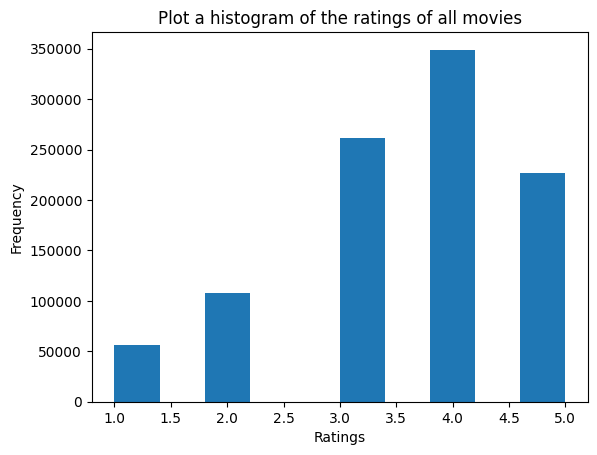

In [23]:
df_HIS1 = df1[['Title','Rating']]
df_HIS1 = df_HIS1.set_index('Title')
plt.hist(df_HIS1)
plt.title('Plot a histogram of the ratings of all movies') #ชื่อหัวตาราง
plt.xlabel('Ratings') #แกนX
plt.ylabel('Frequency') #แกนY
plt.show() #โชว์กราฟ

###2.2
Plot a histogram of the number of ratings each movie recieved. พล็อตฮิสโตแกรมของจำนวนเรตติ้งที่ภาพยนตร์แต่ละเรื่องได้รับ

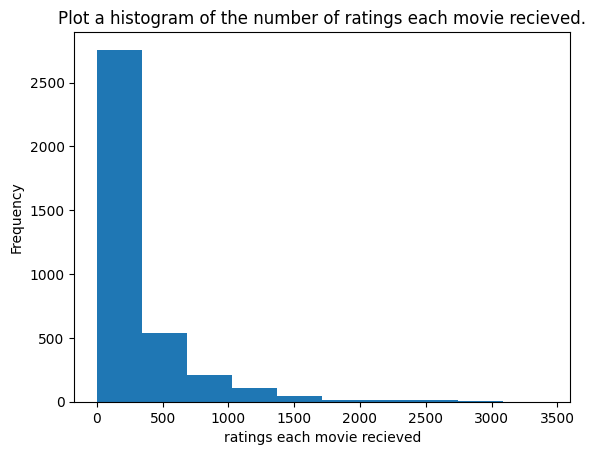

In [24]:
df_HIS2 = df1[['Title','Rating']]
df_HIS20 = df_HIS2.groupby('Title').count().sort_values(by='Rating',ascending = False)
plt.hist(df_HIS20)
plt.title('Plot a histogram of the number of ratings each movie recieved.')
plt.xlabel('ratings each movie recieved')
plt.ylabel('Frequency')
plt.show()

###2.3
Plot a histogram of the average rating for each movie. พล็อตฮิสโตแกรมของเรตติ้งเฉลี่ยของภาพยนตร์แต่ละเรื่อง

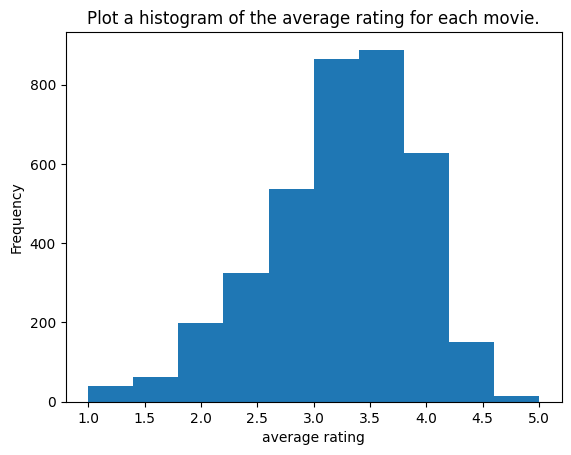

In [25]:
df_HIS3 = df1[['Title','Rating']]
df_HIS30 = df_HIS3.groupby('Title').mean()
plt.hist(df_HIS30)
plt.title('Plot a histogram of the average rating for each movie.')
plt.xlabel('average rating')
plt.ylabel('Frequency')
plt.show()

###2.4
Plot a histogram of the average rating for movies which are rated more than 100 times. พล็อตฮิสโตแกรมของเรตติ้งเฉลี่ยสำหรับภาพยนตร์ที่ได้รับเรตมากกว่า 100 ครั้ง

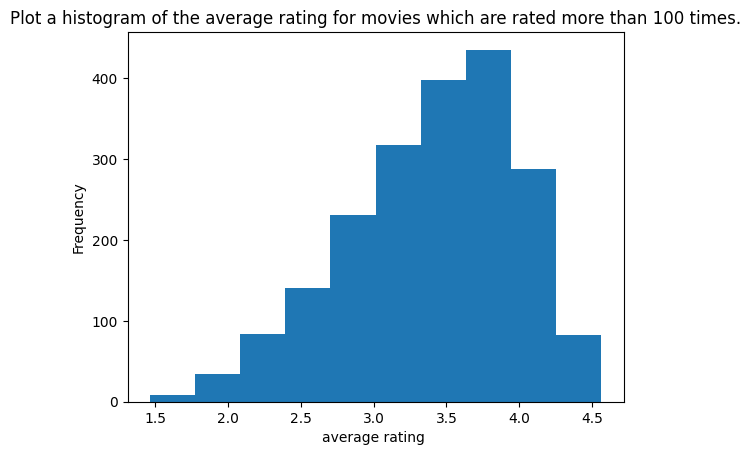

In [26]:
df_HIS4 = df1[['MovieID','Rating']]
df_HIS40 = df_HIS4.groupby('MovieID').count().sort_values(by='Rating',ascending = False)
df_HIS40_100_MA = df_HIS4.groupby('MovieID').mean()
df_HIS40_100_MARe = df_HIS40_100_MA.reset_index()
df_HIS40_100 = df_HIS40_100_MARe.merge(df_HIS40,how = 'left',on='MovieID')
df_HIS40_100forplot = df_HIS40_100[df_HIS40_100['Rating_y'] >= 100]
use_full = df_HIS40_100forplot[['MovieID','Rating_x']]
use_full = use_full.set_index('MovieID')
plt.hist(use_full)
plt.title('Plot a histogram of the average rating for movies which are rated more than 100 times.')
plt.xlabel('average rating ')
plt.ylabel('Frequency')
plt.show()

###2.5
What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times? คุณสังเกตเห็นอะไรเกี่ยวกับส่วนท้ายของฮิสโตแกรมที่คุณใช้ภาพยนตร์ทั้งหมดเทียบกับที่คุณใช้ภาพยนตร์ที่มีเรตมากกว่า 100 ครั้งเท่านั้น เหมือนเปรียบเทียบระหว่าง4กับ2
- จะเห็นได้ว่าค่า average rating ของที่เปรียบเทียบมากกว่า 100 ครั้ง จะมีความละเอียดน้อยกว่า average rating ของที่เปรียบเทียบข้อมูลทั้งหมด



###2.6
Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times? ภาพยนตร์ที่ได้รับเรตติ้งสูงเรื่องใดที่คุณเชื่อว่าดีจริงๆ ผู้ที่ให้คะแนนมากกว่า
100 ครั้ง หรือผู้ที่ให้คะแนนน้อยกว่า 100 ครั้ง?

- จะเห็นได้ว่าrateที่ได้มากที่สุดจะเป็น 3.0 เมื่อดูจากผู้ที่ให้คะแนนมากกว่า 100 ครั้ง และผู้ที่ให้คะแนนน้อยกว่า 100 ครั้ง

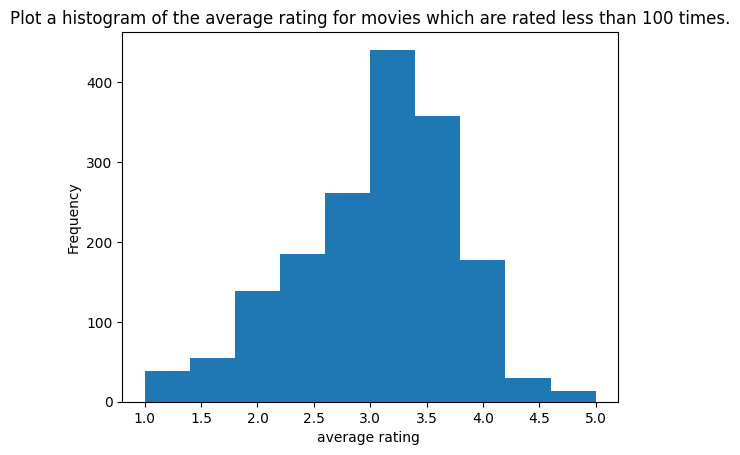

In [27]:
df_HIS6 = df1[['MovieID','Rating']]
df_HIS60 = df_HIS6.groupby('MovieID').count().sort_values(by='Rating',ascending = False)
df_use_hist_100_MA = df_HIS6.groupby('MovieID').mean()
df_use_hist_100_MARe = df_use_hist_100_MA.reset_index()
df_use_hist_100 = df_use_hist_100_MARe.merge(df_HIS60,how = 'left',on='MovieID')
df_use_hist_100forplot = df_use_hist_100[df_use_hist_100['Rating_y'] <= 100]
use_full = df_use_hist_100forplot[['MovieID','Rating_x']]
use_full = use_full.set_index('MovieID')
plt.hist(use_full)
plt.title('Plot a histogram of the average rating for movies which are rated less than 100 times.')
plt.xlabel('average rating ')
plt.ylabel('Frequency')
plt.show()

###2.7
- Make some conjectures about the distribution of ratings? Support your answers with data!
-- For example, what age range do you think has more extreme ratings? Do you think children are more or less likely to rate a movie 1 or 5?
-- Be sure to come up with your own conjectures and support them with data!
คาดเดาเกี่ยวกับการกระจายเรตติ้งบ้างไหม? สนับสนุนคำตอบของคุณด้วยข้อมูล!
เช่น คุณคิดว่าช่วงอายุใดที่มีเรตติ้งสูงส่งกว่ากัน คุณคิดว่าเด็กๆ มีแนวโน้มที่จะให้คะแนนภาพยนตร์ 1 หรือ 5 มากหรือน้อย เพราะเหตุใด อย่าลืมคิดสมมติฐานของคุณเองและสนับสนุนข้อมูลเหล่านั้น!

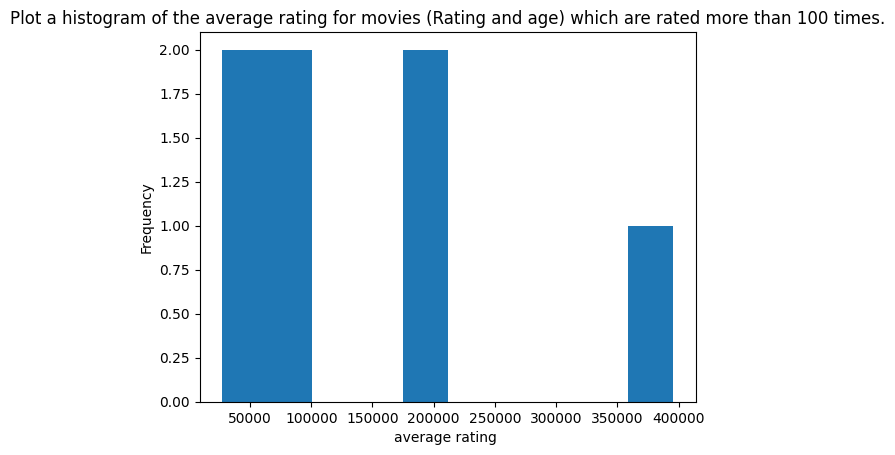

In [28]:
df_HIS7 = df1[['Age','Rating']]
df_HIS7 = df_HIS7.groupby('Age').count().sort_values(by='Rating',ascending = False)
df_HIS70_100_MA3 = df_HIS7.groupby('Age').mean()
df_HIS70_100_MARe3 = df_HIS70_100_MA3.reset_index()
df_HIS70_1003 = df_HIS70_100_MARe3.merge(df_HIS7,how = 'left',on='Age')
df_HIS70_100forplot3 = df_HIS70_1003[df_HIS70_1003['Rating_y'] >= 100]
df1_full3 = df_HIS70_100forplot3[['Age','Rating_x']]
df1_full3 = df1_full3.set_index('Age')
plt.hist(df1_full3)
plt.title('Plot a histogram of the average rating for movies (Rating and age) which are rated more than 100 times.')
plt.xlabel('average rating ')
plt.ylabel('Frequency')
plt.show()


# Problem 3:
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!
    
    ปัญหาที่ 3:
ความสัมพันธ์: ผู้ชายกับผู้หญิง
มาดูความสัมพันธ์ระหว่างชิ้นส่วนข้อมูลที่เรามีให้ละเอียดยิ่งขึ้น

1. จัดทำโครงเรื่องแยกระหว่างผู้ชายกับผู้หญิง และเรตติ้งเฉลี่ยสำหรับภาพยนตร์ทุกเรื่อง

2. จัดทำพล็อตเรื่องระหว่างผู้ชายกับผู้หญิงและเรตเฉลี่ยสำหรับภาพยนตร์ที่มีเรตมากกว่า 200 ครั้ง

3. คำนวณค่าสัมประสิทธิ์สหสัมพันธ์ระหว่างการจัดอันดับของชายและหญิง

คุณสังเกตอะไร?

เรตติ้งใกล้เคียงกันหรือเปล่า? สนับสนุนคำตอบของคุณด้วยข้อมูล!

4. การคาดเดาภายใต้สถานการณ์ใดที่การจัดอันดับที่กำหนดโดยเพศหนึ่งสามารถใช้เพื่อทำนายการจัดอันดับที่กำหนดโดยเพศอื่นได้

ตัวอย่างเช่น ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่ออายุน้อยกว่าหรือมากกว่านั้น?

อย่าลืมคิดสมมติฐานของคุณเองและสนับสนุนข้อมูลเหล่านั้น!

#####EX
Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender
Example
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.
การประเมินภายใต้สถานการณ์ใดที่การจัดอันดับที่กำหนดโดยเพศหนึ่งสามารถใช้เพื่อทำนายการจัดอันดับที่กำหนดโดยเพศอื่นได้

ตัวอย่าง

การคาดเดาที่ 1: ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่ออายุมากขึ้น ลองพิจารณาการให้คะแนนมากกว่าประเภทเดียวกัน

การคาดเดาที่ 2: ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่อพวกเขาเป็นนักวิชาการ/นักการศึกษา ศิลปิน นักศึกษาวิทยาลัย/บัณฑิต และโปรแกรมเมอร์

การคาดเดาที่ 3: ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่อดูแอ็คชั่น ดราม่า สงคราม และทริลเลอร์'
Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.


###3.1
Make a scatter plot of men versus women and their mean rating for every movie. จัดทำโครงเรื่องแยกระหว่างผู้ชายกับผู้หญิง และเรตติ้งเฉลี่ยสำหรับภาพยนตร์ทุกเรื่อง

<ipython-input-29-cd0a3272e606>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_MaleMean = data_Male.groupby('Title').mean()
<ipython-input-29-cd0a3272e606>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_FemaleMean = data_Female.groupby('Title').mean()


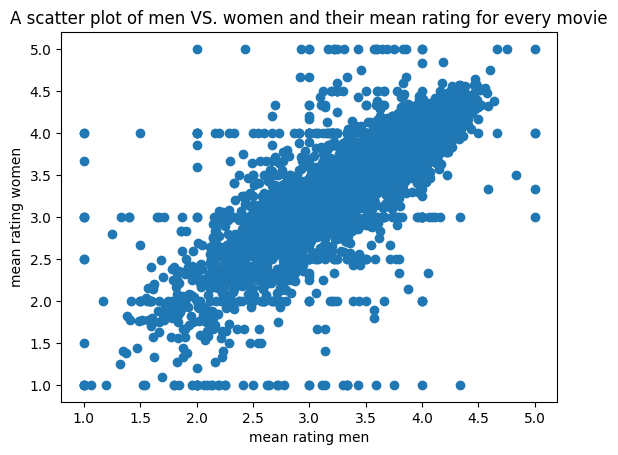

In [29]:
dataMaleFemale1 = df1[['Title','Gender','Rating']]
data_Male = dataMaleFemale1[dataMaleFemale1['Gender']=='M']
data_Female = dataMaleFemale1[dataMaleFemale1['Gender']=='F']
data_MaleMean = data_Male.groupby('Title').mean()
data_FemaleMean = data_Female.groupby('Title').mean()
data_plot = data_MaleMean.merge(data_FemaleMean,how='left',on='Title')
data_plot1 = data_plot.dropna()
plt.scatter(data_plot1['Rating_x'], data_plot1['Rating_y'])
plt.title('A scatter plot of men VS. women and their mean rating for every movie')
plt.xlabel('mean rating men')
plt.ylabel('mean rating women')
plt.show()

###3.2
Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times. จัดทำพล็อตเรื่องระหว่างผู้ชายกับผู้หญิงและเรตเฉลี่ยสำหรับภาพยนตร์ที่มีเรตมากกว่า 200 ครั้ง

<ipython-input-30-fdf5af2f725b>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_MaleMean = data_Male.groupby('Title').mean()
<ipython-input-30-fdf5af2f725b>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_FemaleMean = data_Female.groupby('Title').mean()


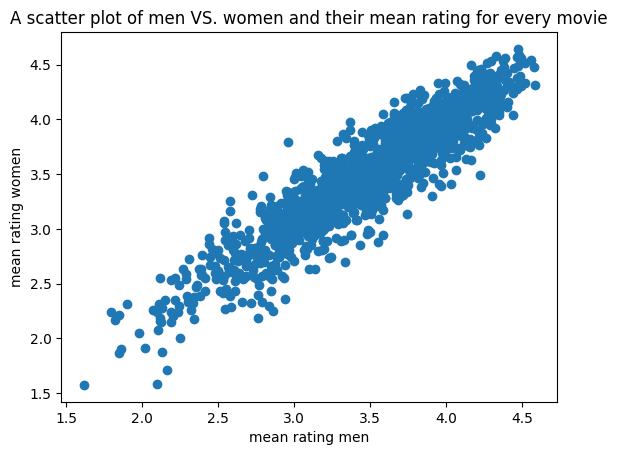

In [30]:
data_MaleFemale0 = df1[['Title','Gender','Rating']]
data_MF01 = data_MaleFemale0[['Title','Rating']]
data_MF02 = data_MF01.groupby('Title').count().sort_values(by='Rating',ascending = False)
data_MF03 = data_MF02.reset_index()

data_Male = dataMaleFemale1[dataMaleFemale1['Gender']=='M'] #ข้อที่แล้ว
data_Female = dataMaleFemale1[dataMaleFemale1['Gender']=='F'] #same on

data_MaleMean = data_Male.groupby('Title').mean()
data_FemaleMean = data_Female.groupby('Title').mean()

data_MF04 = data_MF03.merge(data_MaleMean,how='left',on='Title')
data_MF05 = data_MF03.merge(data_FemaleMean,how='left',on='Title')

data_MF06 = data_MF04[data_MF04['Rating_x'] >= 200]
datafullMale = data_MF06[['Title','Rating_y']]
datafullMale = datafullMale.set_index('Title')

data_MF07 = data_MF05[data_MF05['Rating_x'] >= 200]
datafullFemale = data_MF07[['Title','Rating_y']]
datafullFemale = datafullFemale.set_index('Title')

plt.scatter(datafullMale, datafullFemale)
plt.title('A scatter plot of men VS. women and their mean rating for every movie')
plt.xlabel('mean rating men')
plt.ylabel('mean rating women')
plt.show()

###3.3
Compute the correlation coefficent between the ratings of men and women. What do you observe? Are the ratings similiar or not? Support your answer with data! คำนวณค่าสัมประสิทธิ์สหสัมพันธ์ระหว่างการจัดอันดับของชายและหญิง?คุณสังเกตอะไร?เรตติ้งใกล้เคียงกันหรือเปล่า? สนับสนุนคำตอบของคุณด้วยข้อมูล!

- ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่ออายุน้อยกว่าหรือมากกว่านั้น

H0 : เพศหญิงจะมีการให้คะแนนมากกว่าเพศชายในช่วงอายุเท่า ๆ กัน

H1 : เพศหญิงจะมีการให้คะแนนน้อยกว่าเพศชายในช่วงอายุเท่า ๆ กัน

- จะได้ว่า เพศหญิงจะมีการให้คะแนนมากกว่าเพศชายในช่วงอายุเท่า ๆ กัน

In [31]:
#Ho
print(np.corrcoef(data_plot1['Rating_x'],data_plot1['Rating_y']))
#Ha
print(np.corrcoef(datafullMale['Rating_y'],datafullFemale['Rating_y']))

[[1.         0.76318989]
 [0.76318989 1.        ]]
[[1.         0.91896272]
 [0.91896272 1.        ]]


###3.4
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!


การคาดเดาภายใต้สถานการณ์ใดที่การจัดอันดับที่กำหนดโดยเพศหนึ่งสามารถใช้เพื่อทำนายการจัดอันดับที่กำหนดโดยเพศอื่นได้

ตัวอย่างเช่น ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่ออายุน้อยกว่าหรือมากกว่านั้น?

อย่าลืมคิดสมมติฐานของคุณเองและสนับสนุนข้อมูลเหล่านั้น!

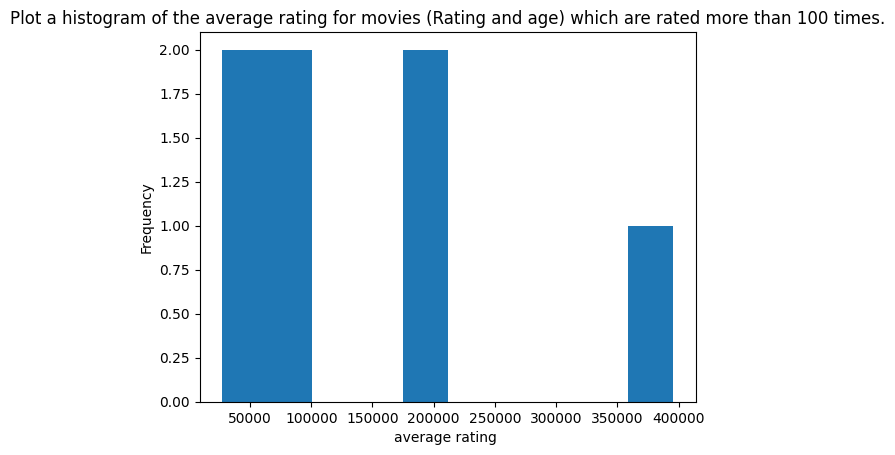

In [32]:
df_HIS8 = df1[['Age','Rating']]
df_HIS8 = df_HIS8.groupby('Age').count().sort_values(by='Rating',ascending = False)
df_HIS8_100_MA3 = df_HIS8.groupby('Age').mean()
df_HIS8_100_MARe3 = df_HIS8_100_MA3.reset_index()
df_HIS8_1003 = df_HIS8_100_MARe3.merge(df_HIS8,how = 'left',on='Age')
df_HIS8_100plot = df_HIS8_1003[df_HIS8_1003['Rating_y'] >= 100]
df_HIS8full = df_HIS8_100plot[['Age','Rating_x']]
df_HIS8full = df_HIS8full.set_index('Age')
plt.hist(df_HIS8full)
plt.title('Plot a histogram of the average rating for movies (Rating and age) which are rated more than 100 times.')
plt.xlabel('average rating ')
plt.ylabel('Frequency')
plt.show()

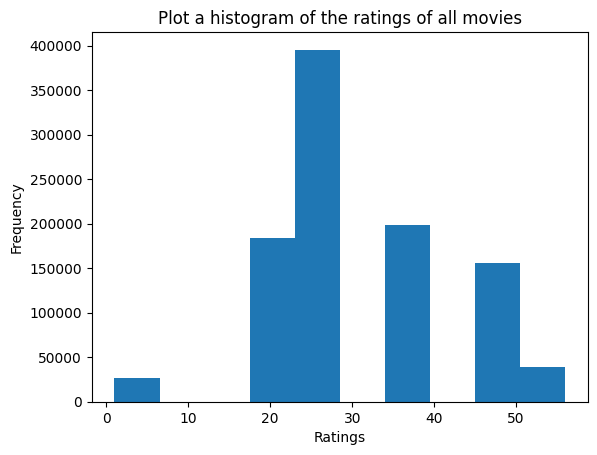

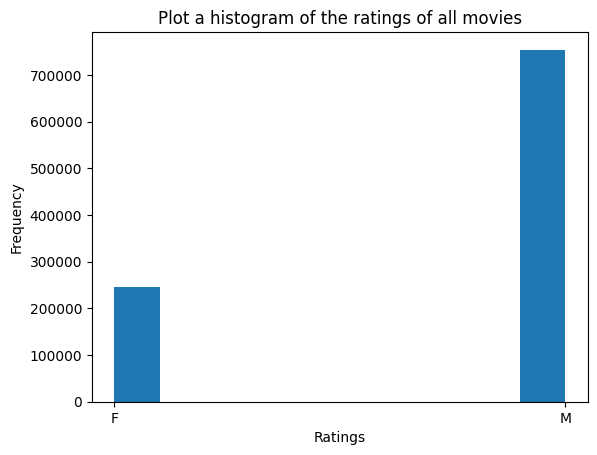

In [33]:
df_HIS9 = df1[['Age','Rating']]
df_HIS9 = df_HIS9.set_index('Rating')
plt.hist(df_HIS9)
plt.title('Plot a histogram of the ratings of all movies')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

df_HIS10 = df1[['Gender','Rating']]
df_HIS10 = df_HIS10.set_index('Rating')
plt.hist(df_HIS10)
plt.title('Plot a histogram of the ratings of all movies')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

#####EX
Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender
Example
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.
การประเมินภายใต้สถานการณ์ใดที่การจัดอันดับที่กำหนดโดยเพศหนึ่งสามารถใช้เพื่อทำนายการจัดอันดับที่กำหนดโดยเพศอื่นได้

ตัวอย่าง

การคาดเดาที่ 1: ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่ออายุมากขึ้น ลองพิจารณาการให้คะแนนมากกว่าประเภทเดียวกัน

การคาดเดาที่ 2: ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่อพวกเขาเป็นนักวิชาการ/นักการศึกษา ศิลปิน นักศึกษาวิทยาลัย/บัณฑิต และโปรแกรมเมอร์

การคาดเดาที่ 3: ชายและหญิงมีความคล้ายคลึงกันมากขึ้นเมื่อดูแอ็คชั่น ดราม่า สงคราม และทริลเลอร์'
Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.



###3.5
Conjecture1 : หนังที่มีเรทติ้ง 5 4 3 2 1 สูงที่สุด เป็นแนวเดียวกัน

- ไม่ใช่หนังแนวเดียวกัน
    
    เรทติ้ง 5 4 เป็นของหนังแนว Drama
    
    เรทติ้ง 3 2 1 เป็นหนังแนว Comedy

In [53]:
PopularGenres_rating = df1[['Rating','Genres']]
PopularGenres_rating = PopularGenres_rating[PopularGenres_rating['Rating'] == 5 ]
PopularGenres = PopularGenres_rating[['Genres','Rating']].groupby('Genres').count().sort_values(by='Rating',ascending = False)
PopularGenres.head(1)

,Rating
Genres,
Drama,29815


In [54]:
PopularGenres_rating = df1[['Rating','Genres']]
PopularGenres_rating = PopularGenres_rating[PopularGenres_rating['Rating'] == 4 ]
PopularGenres = PopularGenres_rating[['Genres','Rating']].groupby('Genres').count().sort_values(by='Rating',ascending = False)
PopularGenres.head(1)

,Rating
Genres,
Drama,42880


In [55]:
PopularGenres_rating = df1[['Rating','Genres']]
PopularGenres_rating = PopularGenres_rating[PopularGenres_rating['Rating'] == 3 ]
PopularGenres = PopularGenres_rating[['Genres','Rating']].groupby('Genres').count().sort_values(by='Rating',ascending = False)
PopularGenres.head(1)

,Rating
Genres,
Comedy,31971


In [58]:
PopularGenres_rating = df1[['Rating','Genres']]
PopularGenres_rating = PopularGenres_rating[PopularGenres_rating['Rating'] == 2 ]
PopularGenres = PopularGenres_rating[['Genres','Rating']].groupby('Genres').count().sort_values(by='Rating',ascending = False)
PopularGenres.head(1)

,Rating
Genres,
Comedy,14513


In [59]:
PopularGenres_rating = df1[['Rating','Genres']]
PopularGenres_rating = PopularGenres_rating[PopularGenres_rating['Rating'] == 1 ]
PopularGenres = PopularGenres_rating[['Genres','Rating']].groupby('Genres').count().sort_values(by='Rating',ascending = False)
PopularGenres.head(1)

,Rating
Genres,
Comedy,8106


#Problem 4:
##Open Ended Question: Business Intelligence
Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
Propose a business question that you think this data can answer.
Suppose you are a Data Sciencetist at a movie company. Convince your boss that your conjecture is correct!
ปัญหาที่ 4: คำถามปลายเปิด: ระบบธุรกิจอัจฉริยะ

การคาดเดาของคุณในปัญหาที่ 1, 2 และ 3 ให้ข้อมูลเชิงลึกที่บริษัทภาพยนตร์อาจสนใจหรือไม่

เสนอคำถามทางธุรกิจที่คุณคิดว่าข้อมูลนี้สามารถตอบได้

สมมติว่าคุณเป็นนักวิทยาศาสตร์ข้อมูลที่บริษัทภาพยนตร์แห่งหนึ่ง

โน้มน้าวเจ้านายของคุณว่าการคาดเดาของคุณถูกต้อง!
เช่น ภาพยนตร์เรื่องไหนที่ควรทำ/ซื้อ? (แยกตามประเภท?)

### For example, which movie to make/buy? (seperating via Genre?)

In [ ]:
moviesdat

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
usersdat

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
ratingsdat

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
df1

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,25,6,11106
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,11106
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,11106
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,25,6,11106


###4.1
Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?

การคาดเดาของคุณในปัญหาที่ 1, 2 และ 3 ให้ข้อมูลเชิงลึกที่บริษัทภาพยนตร์อาจสนใจหรือไม่

**หนังที่มีเรทติ้งน้อยกว่า 3 กี่เรื่องจากระบบทั้งหมด 1000209 เรื่อง** #อยากรู้เพราะ เพื่อดูเรื่องที่ประสบความสำเร็จ

- ได้ว่ามี 1162 เรื่องที่มีเรทติ้งน้อยกว่า 3 จาก 1000209 เรื่อง

In [40]:
TitleMovieRati = df1[['Title','Gender','Genres','Rating']]
TitleMovieRati

,Title,Gender,Genres,Rating
0,One Flew Over the Cuckoo's Nest (1975),F,Drama,5
1,James and the Giant Peach (1996),F,Animation|Children's|Musical,3
2,My Fair Lady (1964),F,Musical|Romance,3
3,Erin Brockovich (2000),F,Drama,4
4,"Bug's Life, A (1998)",F,Animation|Children's|Comedy,5
...,...,...,...,...
1000204,Weekend at Bernie's (1989),M,Comedy,1
1000205,"Crying Game, The (1992)",M,Drama|Romance|War,5
1000206,Welcome to the Dollhouse (1995),M,Comedy|Drama,5
1000207,Sophie's Choice (1982),M,Drama,4


In [ ]:
Rrating = df1[['Title','MovieID','Rating']].groupby('Title').mean('Rating')
RRR = Rrating[Rrating['Rating'] <3].count()

In [ ]:
RRR

MovieID    1162
Rating     1162
dtype: int64

###4.2
Propose a business question that you think this data can answer. เสนอคำถามทางธุรกิจที่คุณคิดว่าข้อมูลนี้สามารถตอบได้ สมมติว่าคุณเป็นนักวิทยาศาสตร์ข้อมูลที่บริษัทภาพยนตร์แห่งหนึ่ง

**หนังแนวไหนมีเรทติ้งเฉลี่ย สูงที่สุด 5 อันดับแรก และมีเรทติ้งเท่าไหร่บ้าง** >> เพื่อนำไปพัฒนาทำแนวหนังแนวดังกล่าว เพื่อเพิ่มยอดต่อไป (มีแนวคิดจากข้อ1.4

- Drama	29815
- Comedy	22719
- Comedy|Drama	10998
- Comedy|Romance	8091
- Drama|Romance	6176

In [ ]:
PopularGenres_rating = df1[['Rating','Genres']]
PopularGenres_rating = PopularGenres_rating[PopularGenres_rating['Rating'] == 5 ]
PopularGenres = PopularGenres_rating[['Genres','Rating']].groupby('Genres').count().sort_values(by='Rating',ascending = False)
PopularGenres.head(5)

,Rating
Genres,
Drama,29815
Comedy,22719
Comedy|Drama,10998
Comedy|Romance,8091
Drama|Romance,6176


###4.3
Suppose you are a Data Sciencetist at a movie company. **Convince your boss that your conjecture is correct!**

โน้มน้าวเจ้านายของคุณว่าการคาดเดาของคุณถูกต้อง! เช่น ภาพยนตร์เรื่องไหนที่ควรทำ/ซื้อ? (แยกตามประเภท?)

ภาพยนต์ที่แนวที่ยอดนิยมที่สุด คือ

Drama	29815

Comedy	22719

Comedy|Drama	10998

และภาพยนต์ในแนว Drama กับ Comedy มีแนวโน้มความคุ้มค่าที่จะทำ เพราะมีผู้ที่สนใจภาพยนต์แนวเดียวสูง และสนใจทั้งสองแนวก็สูง

In [ ]:
PopularGenres_rating = df1[['Rating','Genres']]
PopularGenres_rating = PopularGenres_rating[PopularGenres_rating['Rating'] == 5 ]
PopularGenres = PopularGenres_rating[['Genres','Rating']].groupby('Genres').count().sort_values(by='Rating',ascending = False)
PopularGenres.head(3)

,Rating
Genres,
Drama,29815
Comedy,22719
Comedy|Drama,10998


# Done!

**What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
**How to submit:**

        ส่ง link ของ ipynb และ slides ในรูปแบบ pdf ใน Google Classroom
        
**Note: Each team just needs only one submission**

เสร็จแล้ว!
คุณต้องส่งอะไรบ้าง?

ไฟล์สมุดบันทึก: นี่คือไฟล์ที่คุณต้องส่ง โปรดตรวจสอบให้แน่ใจว่าตารางและรูปภาพที่ลงจุดทั้งหมดอยู่ในสมุดบันทึก
PPT Slides: โปรดเตรียมสไลด์ PPT (10 นาที)

แรงจูงใจในการรวบรวมข้อมูล เหตุใดหัวข้อนี้จึงน่าสนใจสำหรับคุณ อธิบายเกี่ยวกับข้อมูลในส่วนเดี่ยวกับข้อมูลที่ให้ผู้รับฟังฟังเข้าใจความเป็นมาและแจ้งให้ทราบข้อมูล

ความสัมพันธ์ระหว่างหัวข้อนี้กับ Business Intelligence คืออะไร?

คุณวิเคราะห์ข้อมูลอย่างไร?

คุณคาดเดาอะไร และคุณสนับสนุนหรือพิสูจน์หักล้างโดยใช้ข้อมูลอย่างไร

การสื่อสารผลลัพธ์ด้วยตัวเลขหรือตาราง

คุณพบสิ่งที่น่าประหลาดใจในข้อมูลหรือไม่

คุณคิดว่าการตัดสินใจทางธุรกิจเรื่องใดสามารถช่วยตอบได้ ทำไม

(โปรดระบุตัวเลขหรือตารางในรายงาน)